<a href="https://colab.research.google.com/github/BrainConnection/QuTiP/blob/main/Project%20Dynamic%20Decoupling/Dynamic%20Decoupling%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting



In [1]:
!pip install qutip
!pip install numpy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 89.4 MB/s eta 0:00:00


In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


#0. Time-Independent Dispersive Qubit-Resonator Hamiltonian (Rotating Frame, Dispersive Limit)

1) Hamiltonian

$H =\chi\sigma_z a^\dagger a$

In [ ]:
# initial constant
N = 100
chi = 1
alpha_0 = 1

T = 0.1
T_end = 10

In [ ]:
# operator
sz = sigmaz()
sx = sigmax()
sy = sigmay()
sm = sigmam()
a = destroy(N)

H0 = chi*tensor(sz, a.dag()*a)

2) Ramsey Sequence : $\pi/2$ pulse -> free evolution -> $\pi/2$ pulse

In [ ]:
def Hp_coeff(t, args):
  args["T"] = T
  args["T_end"] = T_end
  return (np.pi/(2*T))*(t>0)*(t<T) + (np.pi/(2*T))*(t<T_end)*(t>T_end-T)

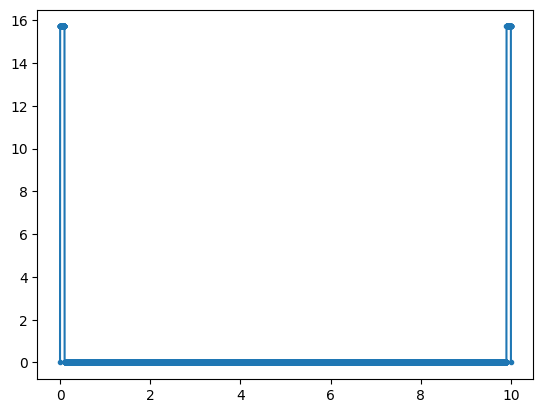

In [ ]:
# pulse shape example
args = {
    "T" : T,
    "T_end" : T_end
}
t = np.linspace(0, T_end, 10000)
plt.figure()
plt.plot(t, Hp_coeff(t, args), '.-')

In [ ]:
psi = tensor(basis(2,0), coherent(N, alpha_0))
tlist = np.linspace(0,T_end,10000)
Hp = tensor(0.5*sx, qeye(N))

H=[H0,[Hp,Hp_coeff]]

3) Plot $X$, $Y$, $Z$

Include $\frac{\pi}{2}$ pulse, Initial State : $|0\rangle$

$\alpha(0)=1$

In [ ]:
sx_composite = tensor(sx, qeye(N))
sy_composite = tensor(sy, qeye(N))
sz_composite = tensor(sz, qeye(N))
sm_composite = tensor(sm, qeye(N))

annihilate_composite = tensor(qeye(2), a)
create_composite = tensor(qeye(2), a.dag())

op_list = [sx_composite, sy_composite, sz_composite, sm_composite, annihilate_composite, create_composite]

res = sesolve(H, psi, tlist, op_list, args = args)

Text(0, 0.5, 'Expectation Value')

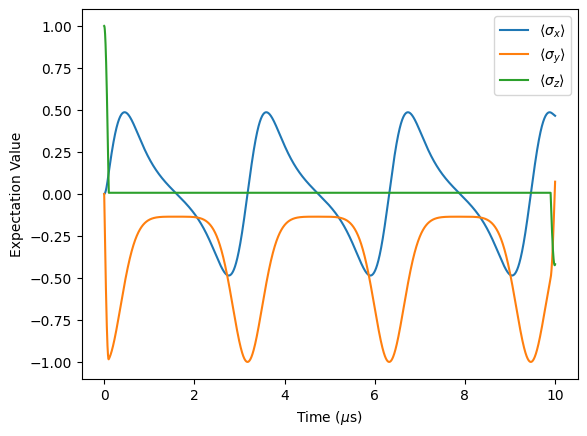

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

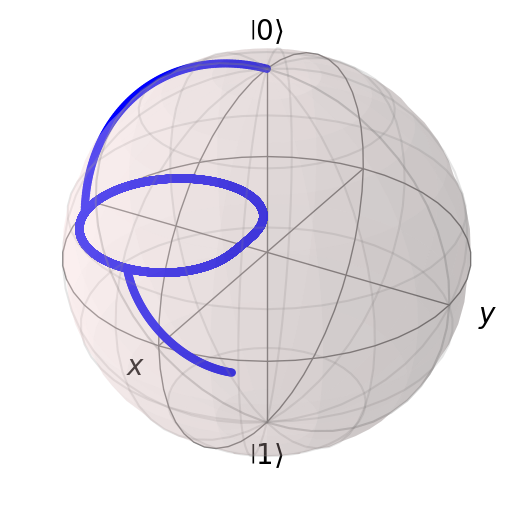

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

4) Plot $\alpha$

Include $\frac{\pi}{2}$ pulse, Initial State : $|0\rangle$

$\alpha(0)=1$

Text(0, 0.5, 'Expectation Value')

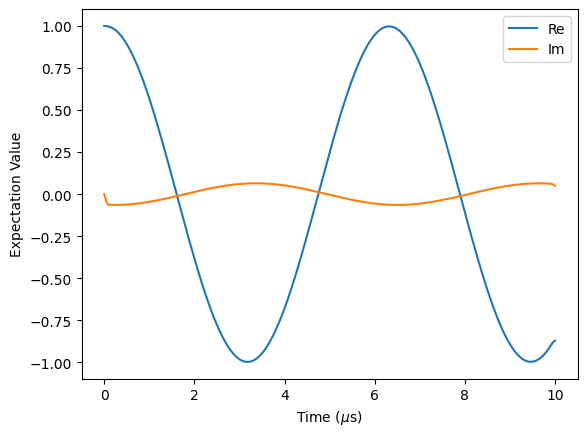

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[4].real, label = 'Re')
ax.plot(tlist, res.expect[4].imag, label = 'Im')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Im[$\\alpha$]')

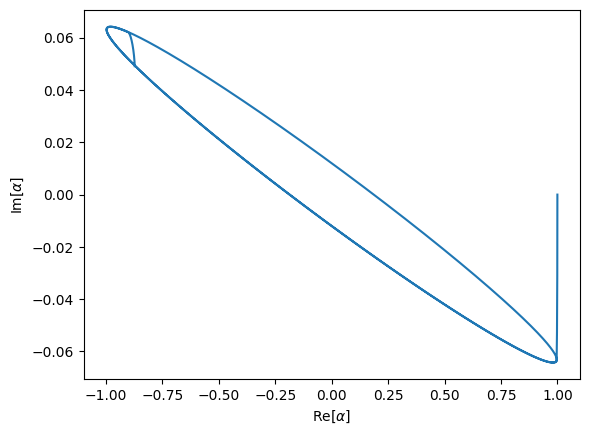

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(res.expect[4].real, res.expect[4].imag, label=r'qubit in $|+\rangle$')
ax.set_xlabel(r'Re[$\alpha$]')
ax.set_ylabel(r'Im[$\alpha$]')

5) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|+\rangle$

$\alpha(0)=1$

Text(0, 0.5, 'Expectation Value')

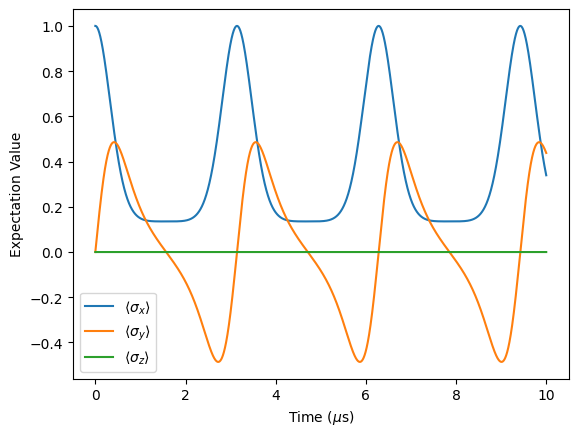

In [ ]:
#plot X, Y, Z
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))
res = sesolve(H0, psi_plus, tlist, op_list, args = args)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

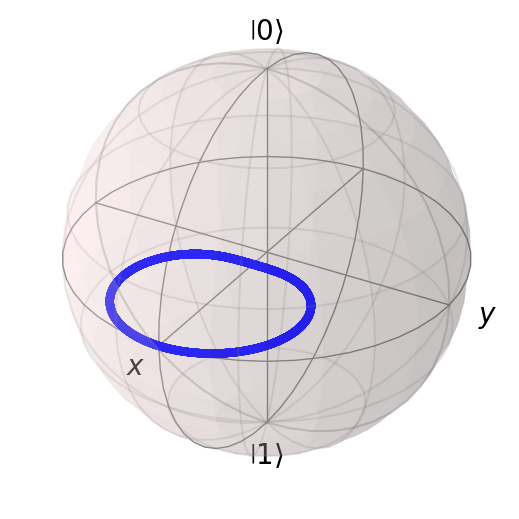

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

6) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|0\rangle$

$\alpha(0)=1$

In [ ]:
tlist = np.linspace(0,2,10000)
res = sesolve(H0, psi_plus, tlist, op_list, args = args)

psi_0 = tensor(basis(2,0), coherent(N, alpha_0))
res_0 = sesolve(H0, psi_0, tlist, op_list, args = args)

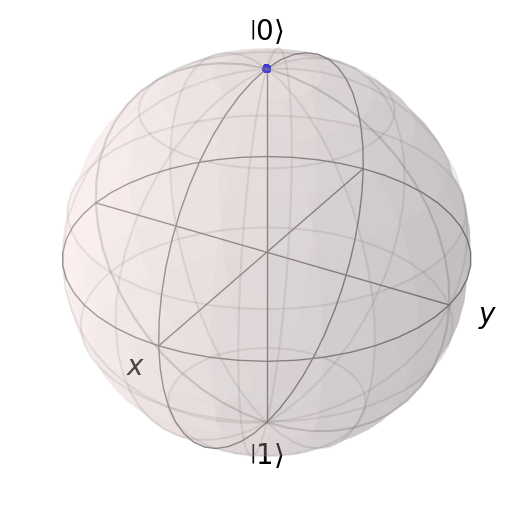

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_0.expect, meth="s")
sphere.show()

7) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|1\rangle$

$\alpha(0)=1$

In [ ]:
tlist = np.linspace(0,2,10000)

psi_1 = tensor(basis(2,1), coherent(N, alpha_0))
res_1 = sesolve(H0, psi_1, tlist, op_list, args = args)

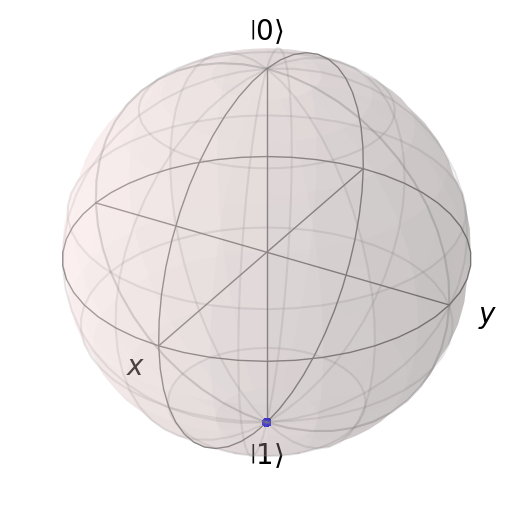

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_1.expect, meth="s")
sphere.show()

8) Plot $\alpha$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|0\rangle$, $|1\rangle$, $|+\rangle$

$\alpha(0)=1$

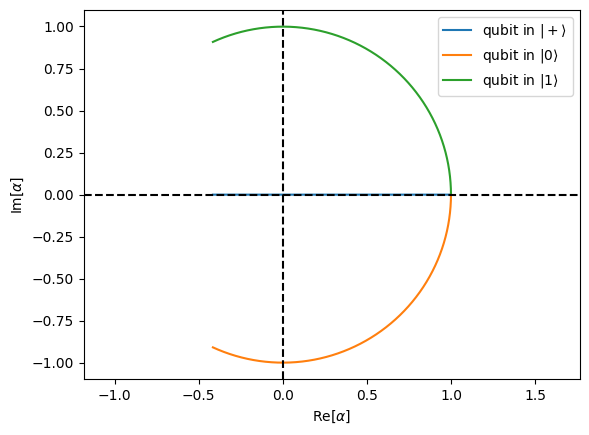

In [ ]:
#plot alpha
plt.figure()
plt.plot(res.expect[4].real, res.expect[4].imag, label=r'qubit in $|+\rangle$')
plt.plot(res_0.expect[4].real, res_0.expect[4].imag, label=r'qubit in $|0\rangle$')
plt.plot(res_1.expect[4].real, res_1.expect[4].imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

9) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|+\rangle$

$\alpha(0)=2$

Text(0, 0.5, 'Expectation Value')

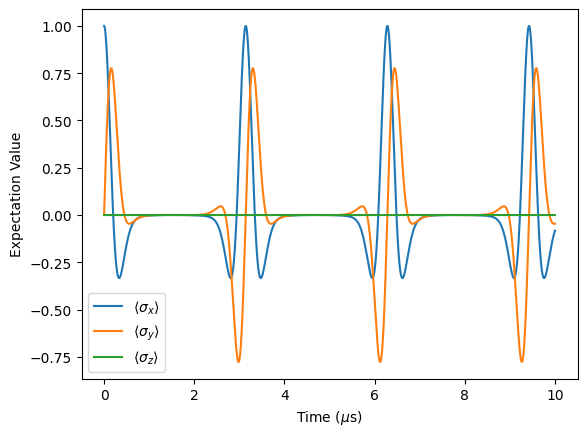

In [ ]:
#plot X, Y, Z
tlist = np.linspace(0,10,10000)
alpha_0 = 2
H0 = chi*tensor(sz, a.dag()*a)
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))

res = sesolve(H0, psi_plus, tlist, op_list)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

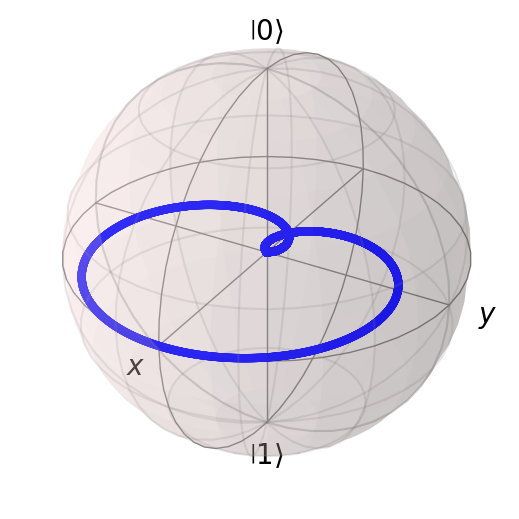

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

10) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|+\rangle$

$\alpha(0)=3$

Text(0, 0.5, 'Expectation Value')

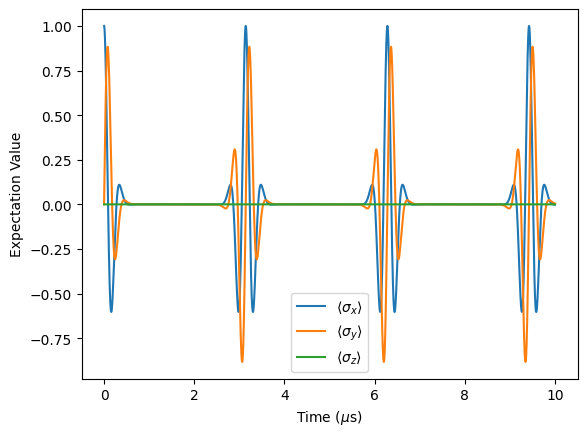

In [ ]:
#plot X, Y, Z
alpha_0 = 3
H0 = chi*tensor(sz, a.dag()*a)
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))

res = sesolve(H0, psi_plus, tlist, op_list)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

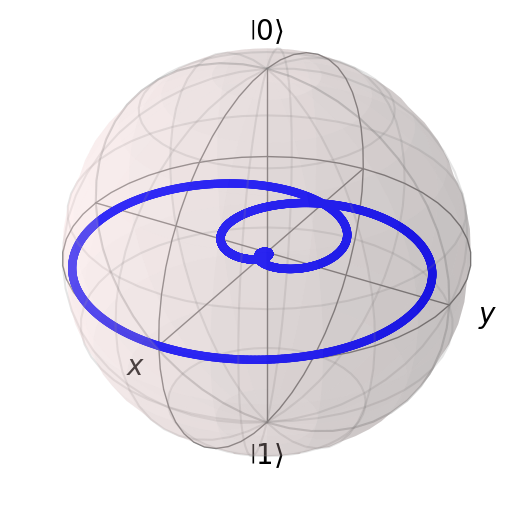

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

11) Plot $X$, $Y$, $Z$

Not Include $\frac{\pi}{2}$ pulse, Initial State : $|+\rangle$

$\alpha(0)=5$

Text(0, 0.5, 'Expectation Value')

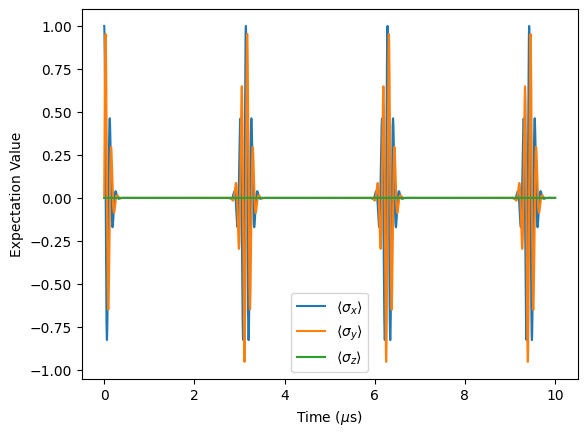

In [ ]:
#plot X, Y, Z
alpha_0 = 5
H0 = chi*tensor(sz, a.dag()*a)
psi_plus = tensor((basis(2,0)+basis(2,1))/np.sqrt(2), coherent(N, alpha_0))

res = sesolve(H0, psi_plus, tlist, op_list)

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

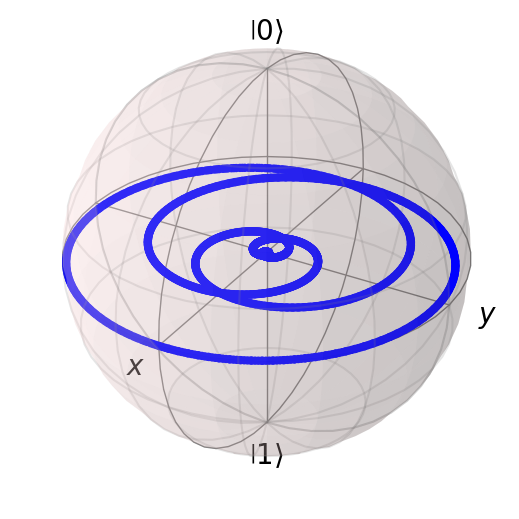

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res.expect, meth="s")
sphere.show()

#1. Resonator Drive Pulse

1) Hamiltonian & Photon Number Expectation

Note: Let us consider a case where the resonator is driven by such a drive with a constant amplitude $A_0$, i.e.,
$$\hat{H}_r (t) =\omega_r \hat{a}^\dagger \hat{a} + A_0 (\hat{a} + \hat{a}^\dagger) \cos{(\omega_{r,d} t)}.$$
We move to the frame rotating at the drive frequency of $\omega_{r,d}$ by performing the following transformation
$$\tilde{\hat{H}}_r = \hat{U}\hat{H}_r\hat{U}^\dagger + i\dot{\hat{U}}\hat{U}^\dagger,$$
where $\hat{U} = e^{i\omega_{r,d} t \hat{a}^\dagger\hat{a} }$. This gives
$$\tilde{\hat{H}}_r = (\omega_r - \omega_{r,d})\hat{a}^\dagger \hat{a} + \frac{A_0}{2}(\hat{a}e^{-i\omega_{r,d}t} + \hat{a}^\dagger e^{i\omega_{r,d}t})(e^{i\omega_{r,d}t} + e^{-i\omega_{r,d}t}) \approx (\omega_r - \omega_{r,d})\hat{a}^\dagger \hat{a} + \frac{A_0}{2}(\hat{a} + \hat{a}^\dagger ).$$

The Heisenberg equation of motion for $\hat{a}$, with an additional phenomenological term for decay, is given by
\begin{align*}
\dot{\hat{a}}(t) = \left[- i(\omega_r - \omega_{r,d}) - \frac{\kappa}{2}\right]\hat{a} - \frac{A_0}{2}.
\end{align*}
In the steady state, this gives the slowly-varying coherent state amplitude of
$$\alpha_{ss} = - \frac{A_0/2}{i(\omega_r - \omega_{r,d}) + \kappa/2}.$$
Therefore, the steady-state photon number is
$$
\bar{n}_{ss} = |\alpha_{ss}|^2 = \frac{(A_0 / 2)^2}{(\omega_r - \omega_{r,d})^2 + (\kappa / 2)^2 }
$$

In [141]:
# Basic parameters
N = 20 # dimension of Hilbert space (cavity)

omega_r = 2 * np.pi * 7.0  # resonator frequency in units of GHz
omega_rd = 2 * np.pi * 5.5  # qubit frequency in units of GHz
kappa = 2 * np.pi * 0.01   # external coupling rate of resonator in units of GHz

tau = 200 # readout pulse length in units of ns

In [142]:
# operator
a = destroy(N)

H0 = omega_r*a.dag()*a

2) Square Pulse

In [143]:
# time-dependent coefficient for drive
def Hrd_env(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * (0 <= t) * (t <= T)

def Hrd_coeff(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env(t, args) * np.cos(omega_rd * t)

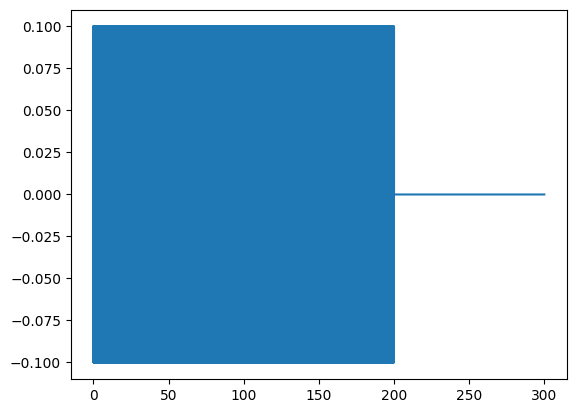

In [144]:
# list of times for numerical simulation (in units of ns)
tlist = np.linspace(0, 300, 1000000)

plt.figure()
plt.plot(tlist, Hrd_coeff(tlist, {'A': 0.1, 'T': 200, 'omega_rd': omega_rd}))

In [145]:
A_drive = 0.05 * 2 * np.pi  # drive amplitude in units of GHz

result0 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 200, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 1000000, rhs_reuse = True, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

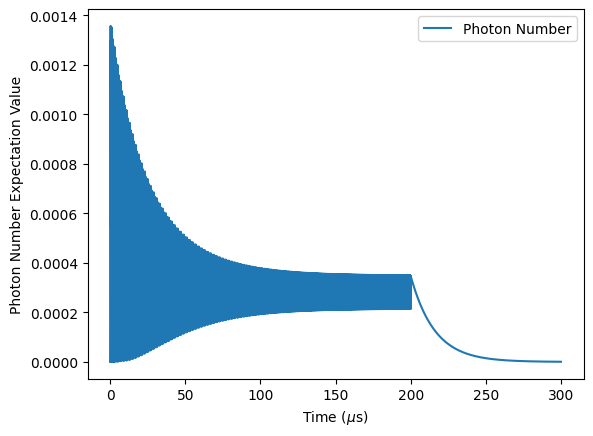

In [146]:
# Plot photon number expectation value

fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result0.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

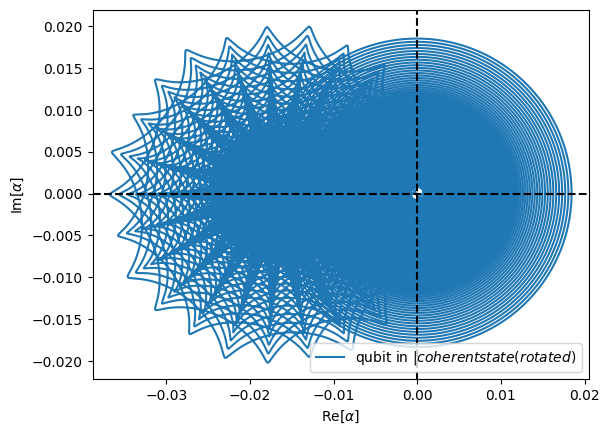

In [147]:
# Plot alpha

alpha0 = result0.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha0.real, alpha0.imag, label=r'qubit in $|coherent state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

3) Gaussian Pulse

In [148]:
# time-dependent coefficient for drive
def Hrd_env_var(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * np.exp(-((t-T/2)**2/((T/4)**2)))*(0 <= t) * (t <= T)

def Hrd_coeff_var(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env_var(t, args) * np.cos(omega_rd * t)

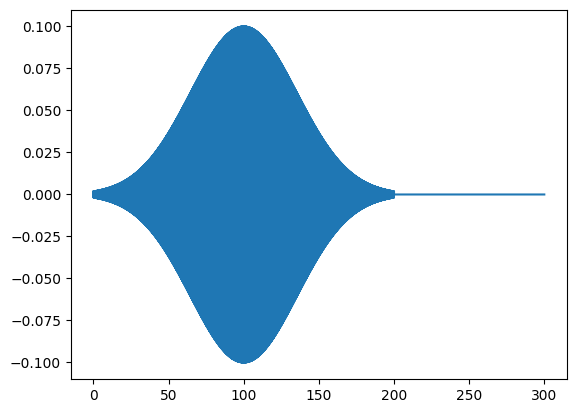

In [149]:
# list of times for numerical simulation (in units of ns)
tlist = np.linspace(0, 300, 1000000)

plt.figure()
plt.plot(tlist, Hrd_coeff_var(tlist, {'A': 0.1, 'T': 200, 'omega_rd': omega_rd}))

In [150]:
A_drive = 0.05 * 2 * np.pi  # drive amplitude in units of GHz

result1 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff_var]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 200, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 1000000, rhs_reuse = True, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

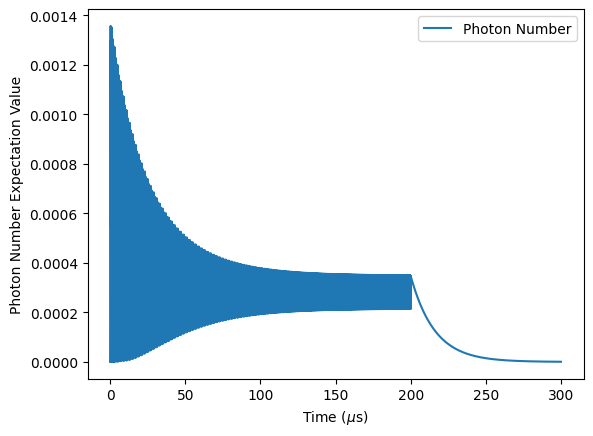

In [151]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result1.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

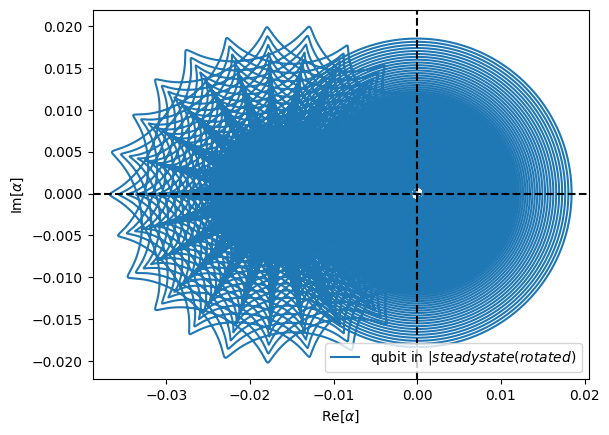

In [152]:
# Plot alpha

alpha1 = result1.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha1.real, alpha1.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

3) Exponential Pulse

In [153]:
# time-dependent coefficient for drive
def Hrd_env_exp(t, args):
    """
    Envelope function for the readout drive
    """
    A = args['A'] # amplitude of the readout drive
    T = args['T'] # duration of the readout drive, in units of ns

    return A * np.exp(t/(T/4))*(0 <= t) * (t <= T)

def Hrd_coeff_exp(t, args):
    omega_rd = args['omega_rd']
    return Hrd_env_exp(t, args) * np.cos(omega_rd * t)

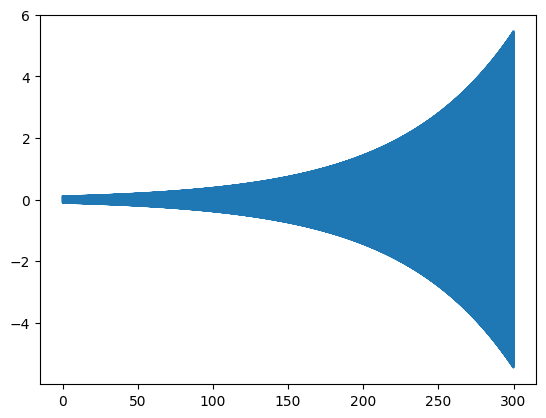

In [154]:
# list of times for numerical simulation (in units of ns)
tlist = np.linspace(0, 300, 1000000)

plt.figure()
plt.plot(tlist, Hrd_coeff_exp(tlist, {'A': 0.1, 'T': 300, 'omega_rd': omega_rd}))

In [155]:
A_drive = 0.05 * 2 * np.pi  # drive amplitude in units of GHz

result2 = mesolve(
    [H0, [a + a.dag(), Hrd_coeff_exp]],
    basis(N, 0),
    tlist,
    c_ops = [np.sqrt(kappa) * a],
    args = {'A': A_drive, 'T': 300, 'omega_rd': omega_rd},
    e_ops = [a.dag() * a, a],
    options = Options(nsteps = 1000000, rhs_reuse = True, atol = 1e-10, rtol = 1e-8)
)

Text(0, 0.5, 'Photon Number Expectation Value')

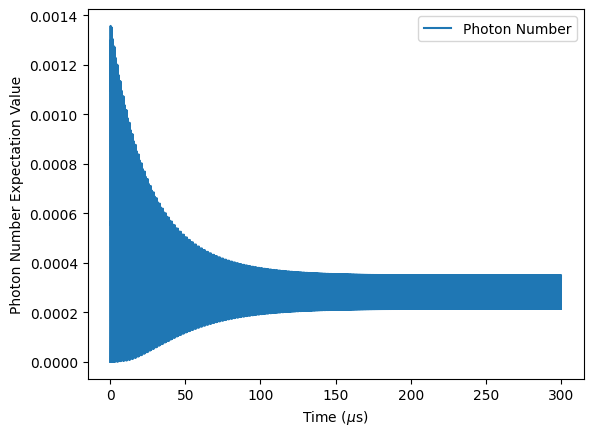

In [156]:
# Plot photon number expectation value
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, result2.expect[0], label = 'Photon Number')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Photon Number Expectation Value')

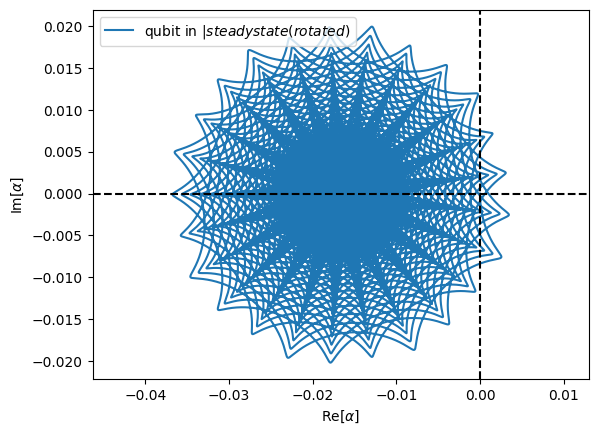

In [157]:
# Plot alpha

alpha2 = result2.expect[1] * np.exp(1j * omega_rd * tlist)

plt.figure()
plt.plot(alpha2.real, alpha2.imag, label=r'qubit in $|steady state(rotated)$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

#2. Time-Independent Qubit-Resonator Hamiltonian (Quantum Rabi Model)

1) Hamiltonian

$H = \frac{\omega_q}{2}\sigma_z + \omega_r a^\dagger a + g\sigma_x(a+a^\dagger)$

In [ ]:
# constant
N = 100
alpha_0 = 1

omega_q = 2
omega_r = 1
g = 0.1

T_end = 10

In [ ]:
# operator
sz = sigmaz()
sx = sigmax()
sy = sigmay()
sm = sigmam()
a = destroy(N)

H0 = 0.5*omega_q*tensor(sz, qeye(N)) + omega_r*tensor(qeye(2), a.dag()*a) + g*tensor(sx, a + a.dag())

In [ ]:
sx_composite = tensor(sx, qeye(N))
sy_composite = tensor(sy, qeye(N))
sz_composite = tensor(sz, qeye(N))
sm_composite = tensor(sm, qeye(N))

annihilate_composite = tensor(qeye(2), a)
create_composite = tensor(qeye(2), a.dag())

tlist = np.linspace(0,T_end,10000)
op_list = [sx_composite, sy_composite, sz_composite, sm_composite, annihilate_composite, create_composite]

psi_00 = tensor(basis(2,0), basis(N,0))
psi_p0 = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), basis(N,0))
psi_10 = tensor(basis(2,1), basis(N,0))
psi_0c = tensor(basis(2,0), coherent(N, alpha_0))
psi_pc = tensor((basis(2,0) + basis(2,1))/np.sqrt(2), coherent(N, alpha_0))
psi_1c = tensor(basis(2,1), coherent(N, alpha_0))

res_00 = sesolve(H0, psi_00, tlist, op_list, args = args)
res_p0 = sesolve(H0, psi_p0, tlist, op_list, args = args)
res_10 = sesolve(H0, psi_10, tlist, op_list, args = args)
res_0c = sesolve(H0, psi_0c, tlist, op_list, args = args)
res_pc = sesolve(H0, psi_pc, tlist, op_list, args = args)
res_1c = sesolve(H0, psi_1c, tlist, op_list, args = args)

Text(0, 0.5, 'Expectation Value')

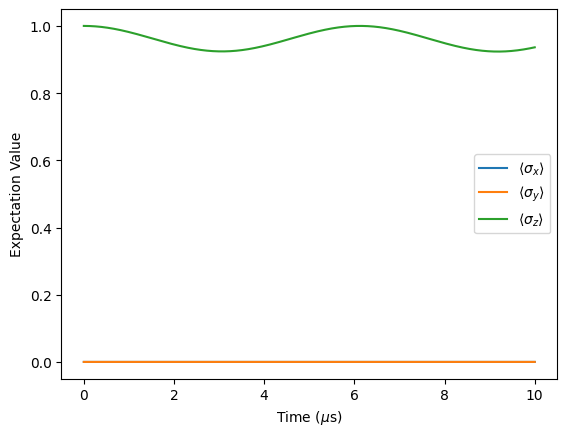

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_00.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_00.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_00.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

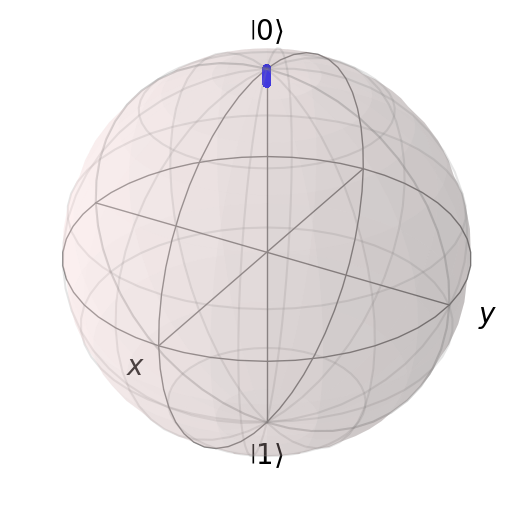

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_00.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

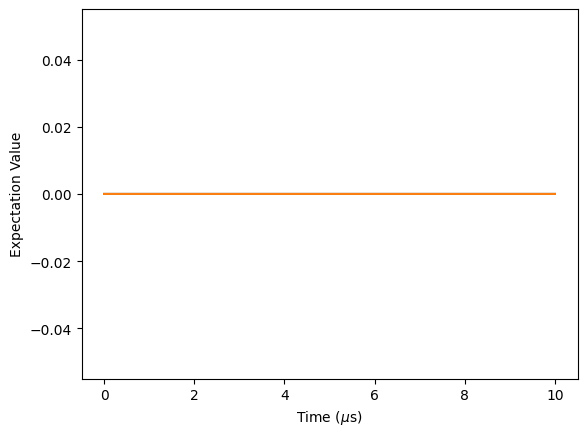

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_00.expect[4].real, label = 'Re')
ax.plot(tlist, res_00.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

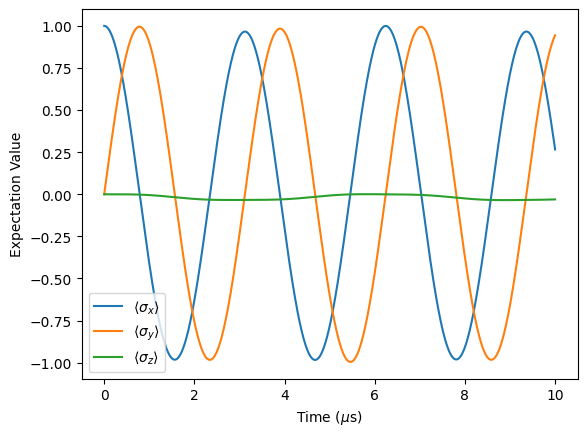

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_p0.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_p0.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_p0.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

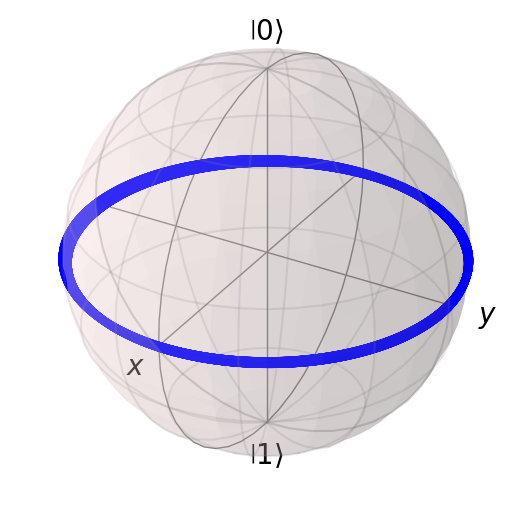

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_p0.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

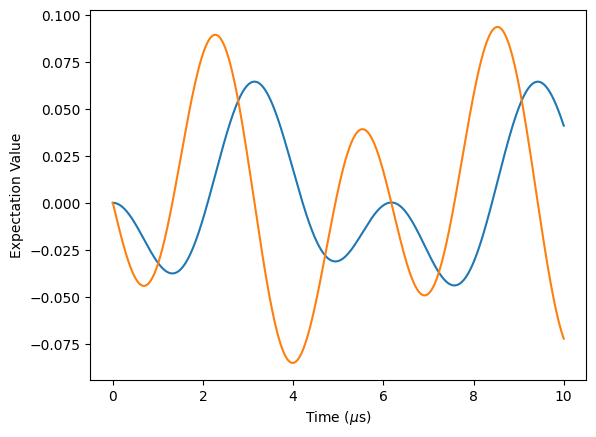

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_p0.expect[4].real, label = 'Re')
ax.plot(tlist, res_p0.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

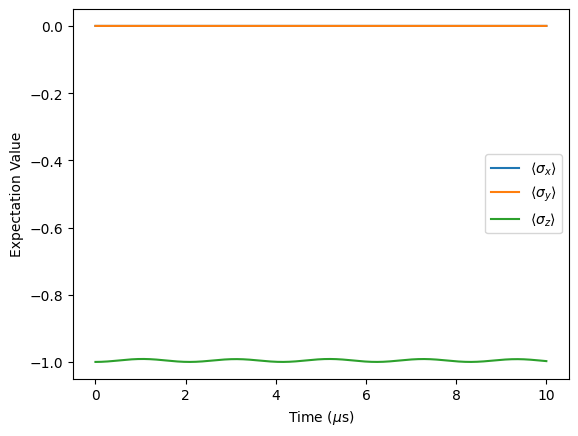

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_10.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_10.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_10.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

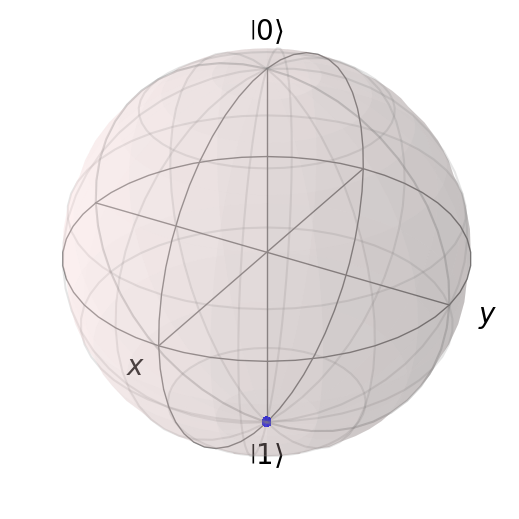

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_10.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

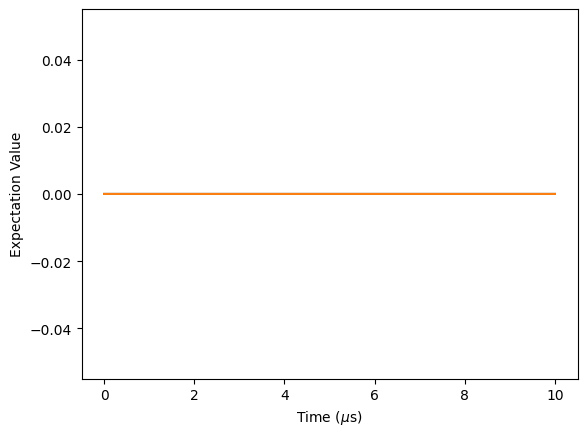

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_10.expect[4].real, label = 'Re')
ax.plot(tlist, res_10.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

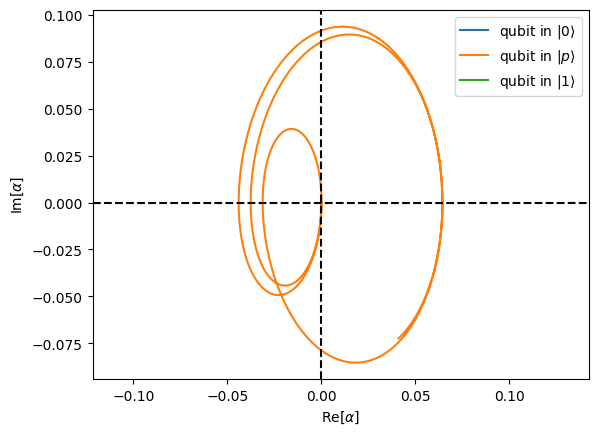

In [ ]:
plt.figure()
plt.plot(res_00.expect[4].real, res_00.expect[4].imag, label=r'qubit in $|0\rangle$')
plt.plot(res_p0.expect[4].real, res_p0.expect[4].imag, label=r'qubit in $|p\rangle$')
plt.plot(res_10.expect[4].real, res_10.expect[4].imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

Text(0, 0.5, 'Expectation Value')

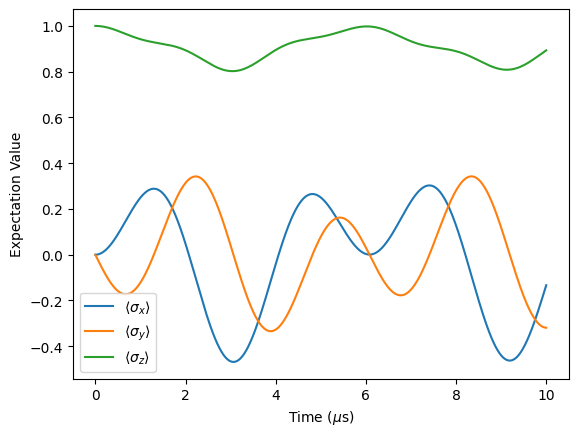

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_0c.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_0c.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_0c.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

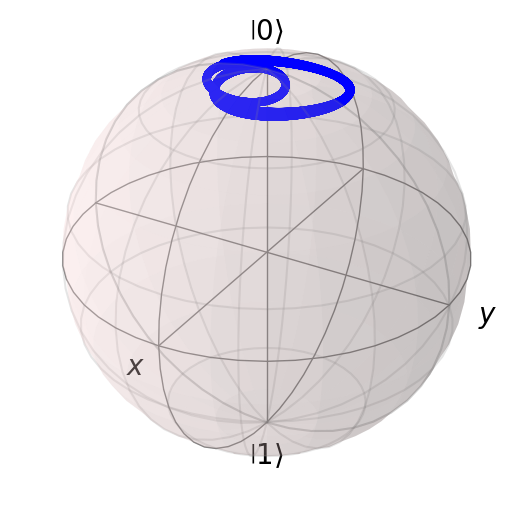

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_0c.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

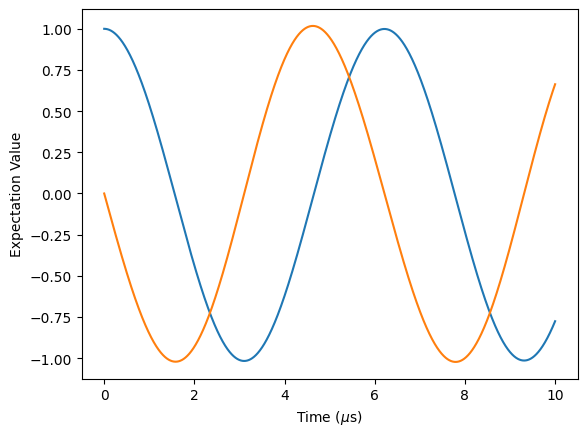

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_0c.expect[4].real, label = 'Re')
ax.plot(tlist, res_0c.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

Text(0, 0.5, 'Expectation Value')

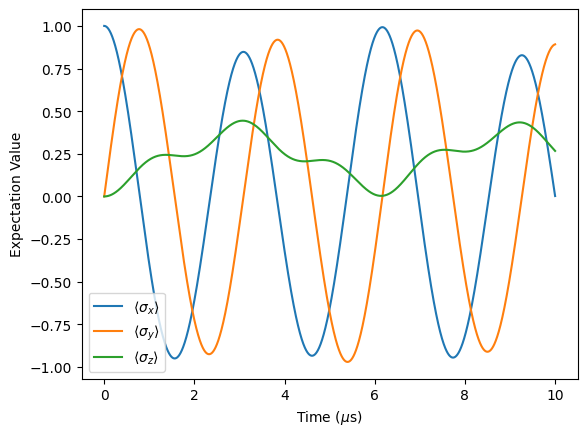

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_pc.expect[0], label = r'$\langle\sigma_x\rangle$')
ax.plot(tlist, res_pc.expect[1], label = r'$\langle\sigma_y\rangle$')
ax.plot(tlist, res_pc.expect[2], label = r'$\langle\sigma_z\rangle$')
ax.legend(loc = 0)
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

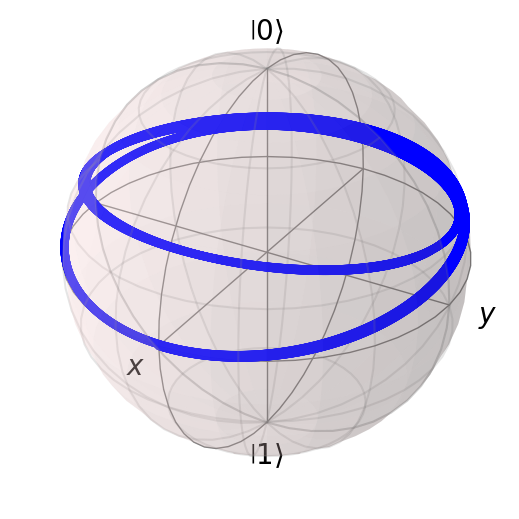

In [ ]:
# Create Bloch sphere plot
sphere = Bloch()
sphere.zlabel = [r'$\left|0\right>$', r'$\left|1\right>$']
sphere.add_points(res_pc.expect, meth="s")
sphere.show()

Text(0, 0.5, 'Expectation Value')

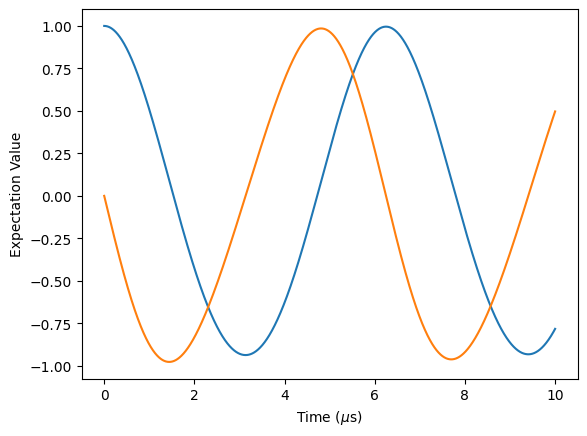

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, res_pc.expect[4].real, label = 'Re')
ax.plot(tlist, res_pc.expect[4].imag, label = 'Im')
ax.set_xlabel('Time ($\mu$s)')
ax.set_ylabel('Expectation Value')

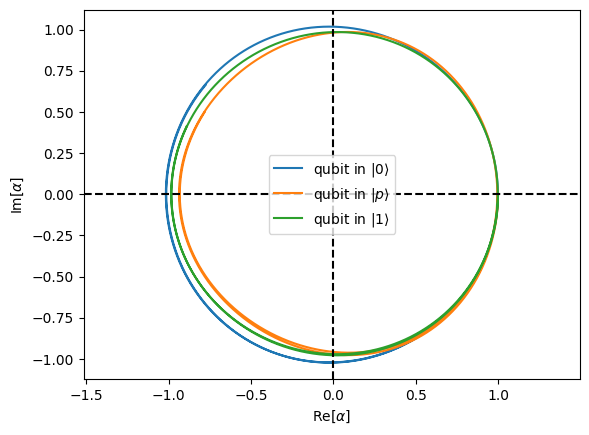

In [ ]:
plt.figure()
plt.plot(res_0c.expect[4].real, res_0c.expect[4].imag, label=r'qubit in $|0\rangle$')
plt.plot(res_pc.expect[4].real, res_pc.expect[4].imag, label=r'qubit in $|p\rangle$')
plt.plot(res_1c.expect[4].real, res_1c.expect[4].imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

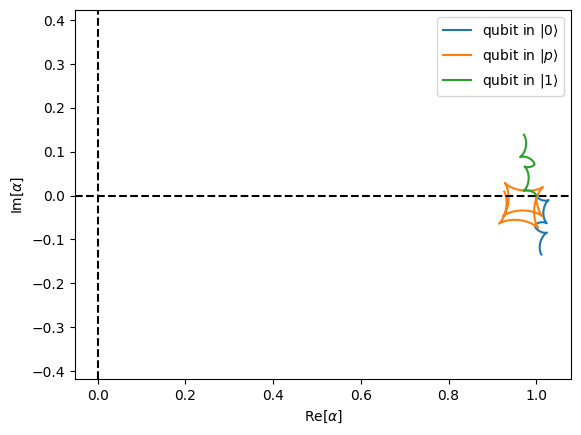

In [ ]:
res_rot_0c = res_0c.expect[4]*np.exp(1j*omega_r*tlist)
res_rot_pc = res_pc.expect[4]*np.exp(1j*omega_r*tlist)
res_rot_1c = res_1c.expect[4]*np.exp(1j*omega_r*tlist)

plt.figure()
plt.plot(res_rot_0c.real, res_rot_0c.imag, label=r'qubit in $|0\rangle$')
plt.plot(res_rot_pc.real, res_rot_pc.imag, label=r'qubit in $|p\rangle$')
plt.plot(res_rot_1c.real, res_rot_1c.imag, label=r'qubit in $|1\rangle$')
plt.xlabel(r'Re[$\alpha$]')
plt.ylabel(r'Im[$\alpha$]')
plt.axis('equal')
plt.axvline(0.0, color='black', ls='--')
plt.axhline(0.0, color='black', ls='--')
plt.legend()

#2. blahblah